<a href="https://colab.research.google.com/github/ckusmana21/2002_Final_Project/blob/main/Kusmana_2002_Viz_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting notes: This is the main data source: https://www.icpsr.umich.edu/web/ICPSR/studies/37990. I converted the .tsv to .csv format, then use the .csv for the analysis below. The original files are too large for GitHub, so this is the public google drive link to the dataset: https://drive.google.com/file/d/1kPDsCiNrcf0AjFIZi_uh4OZpUX16XahY/view


*   The last two visualizations (animation and ploty) cannot be displayed on Github, but I included the dataset above.



Filtering Data

In [1]:
import pandas as pd
import numpy as np

file_path1 = r"/content/HDPulse_data_export.csv"
median_data = pd.read_csv(file_path1)

file_path = r"/content/Sentencing_Data_Imported_DS2002.csv"
data_raw = pd.read_csv(file_path)

columns_to_keep = ['AGE', 'MONSEX', 'NEWRACE', 'NEWEDUC', 'WGT1', 'BASEHI',
                   'IS924C', 'NEWCNVTN', 'CITIZEN', 'COMBDRG2', 'SENTTCAP',
                   'XCRHISSR', 'OFFGUIDE', 'CIRCDIST']
data1 = data_raw[columns_to_keep]
## data1.head()


<ipython-input-1-c2b04ddaef77>:8: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv(file_path)


In [2]:
# FILTERING THE DATA
# only COMBDRG 1 and 2 (powder &coke). XCRHISSR == 6, OFFGUIDE == 10

data = data1[(data1['XCRHISSR'] == 6) &
             (data1['OFFGUIDE'] == 10) &
             (data1['COMBDRG2'].isin([1, 2]))]

# CIRCDIST: income level for each state (and population)

district_to_state = {
    1: 'Dist of Columbia', 2: 'Maine', 3: 'Massachusetts', 4: 'New Hampshire',
    5: 'Puerto Rico', 6: 'Rhode Island', 7: 'Connecticut', 8: 'New York East',
    9: 'New York North', 10: 'New York South', 11: 'New York West', 12: 'Vermont',
    13: 'Delaware', 14: 'New Jersey', 15: 'Penn. East', 16: 'Penn. Mid',
    17: 'Penn. West', 18: 'Virgin Islands', 19: 'Maryland', 20: 'N Carolina East',
    21: 'N Carolina Mid', 22: 'N Carolina West', 23: 'South Carolina',
    24: 'Virginia East', 25: 'Virginia West', 26: 'W Virginia North',
    27: 'W Virginia South', 28: 'Louisiana East', 29: 'Louisiana Middle',
    30: 'Louisiana West', 31: 'Miss. North', 32: 'Miss. South', 33: 'Texas East',
    34: 'Texas North', 35: 'Texas South', 36: 'Texas West', 37: 'Kentucky East',
    38: 'Kentucky West', 39: 'Michigan East', 40: 'Michigan West', 41: 'Ohio North',
    42: 'Ohio South', 43: 'Tennessee East', 44: 'Tennessee Mid', 45: 'Tennessee West',
    46: 'Illinois Cent', 47: 'Illinois North', 48: 'Illinois South', 49: 'Indiana North',
    50: 'Indiana South', 51: 'Wisconsin East', 52: 'Wisconsin West', 53: 'Arkansas East',
    54: 'Arkansas West', 55: 'Iowa North', 56: 'Iowa South', 57: 'Minnesota',
    58: 'Missouri East', 59: 'Missouri West', 60: 'Nebraska', 61: 'North Dakota',
    62: 'South Dakota', 63: 'Alaska', 64: 'Arizona', 65: 'California Cent',
    66: 'California East', 67: 'California North', 68: 'California South',
    69: 'Guam', 70: 'Hawaii', 71: 'Idaho', 72: 'Montana', 73: 'Nevada',
    74: 'N Mariana Island', 75: 'Oregon', 76: 'Washington East', 77: 'Washington West',
    78: 'Colorado', 79: 'Kansas', 80: 'New Mexico', 81: 'Oklahoma East',
    82: 'Oklahoma North', 83: 'Oklahoma West', 84: 'Utah', 85: 'Wyoming',
    86: 'Alabama Mid', 87: 'Alabama North', 88: 'Alabama South', 89: 'Florida Mid',
    90: 'Florida North', 91: 'Florida South', 92: 'Georgia Mid', 93: 'Georgia North',
    94: 'Georgia South'
}

# Map the CIRCDIST column to the new STATE_addition column
data['STATE_addition'] = data['CIRCDIST'].map(district_to_state)


# Create a mapping dictionary for regions to states
region_to_state = {
    'Dist of Columbia': 'District of Columbia',
    'Maine': 'Maine',
    'Massachusetts': 'Massachusetts',
    'New Hampshire': 'New Hampshire',
    'Puerto Rico': 'Puerto Rico',
    'Rhode Island': 'Rhode Island',
    'Connecticut': 'Connecticut',
    'New York East': 'New York',
    'New York North': 'New York',
    'New York South': 'New York',
    'New York West': 'New York',
    'Vermont': 'Vermont',
    'Delaware': 'Delaware',
    'New Jersey': 'New Jersey',
    'Penn. East': 'Pennsylvania',
    'Penn. Mid': 'Pennsylvania',
    'Penn. West': 'Pennsylvania',
    'Virgin Islands': 'Virgin Islands',
    'Maryland': 'Maryland',
    'N Carolina East': 'North Carolina',
    'N Carolina Mid': 'North Carolina',
    'N Carolina West': 'North Carolina',
    'South Carolina': 'South Carolina',
    'Virginia East': 'Virginia',
    'Virginia West': 'Virginia',
    'W Virginia North': 'West Virginia',
    'W Virginia South': 'West Virginia',
    'Louisiana East': 'Louisiana',
    'Louisiana Middle': 'Louisiana',
    'Louisiana West': 'Louisiana',
    'Miss. North': 'Mississippi',
    'Miss. South': 'Mississippi',
    'Texas East': 'Texas',
    'Texas North': 'Texas',
    'Texas South': 'Texas',
    'Texas West': 'Texas',
    'Kentucky East': 'Kentucky',
    'Kentucky West': 'Kentucky',
    'Michigan East': 'Michigan',
    'Michigan West': 'Michigan',
    'Ohio North': 'Ohio',
    'Ohio South': 'Ohio',
    'Tennessee East': 'Tennessee',
    'Tennessee Mid': 'Tennessee',
    'Tennessee West': 'Tennessee',
    'Illinois Cent': 'Illinois',
    'Illinois North': 'Illinois',
    'Illinois South': 'Illinois',
    'Indiana North': 'Indiana',
    'Indiana South': 'Indiana',
    'Wisconsin East': 'Wisconsin',
    'Wisconsin West': 'Wisconsin',
    'Arkansas East': 'Arkansas',
    'Arkansas West': 'Arkansas',
    'Iowa North': 'Iowa',
    'Iowa South': 'Iowa',
    'Minnesota': 'Minnesota',
    'Missouri East': 'Missouri',
    'Missouri West': 'Missouri',
    'Nebraska': 'Nebraska',
    'North Dakota': 'North Dakota',
    'South Dakota': 'South Dakota',
    'Alaska': 'Alaska',
    'Arizona': 'Arizona',
    'California Cent': 'California',
    'California East': 'California',
    'California North': 'California',
    'California South': 'California',
    'Guam': 'Guam',
    'Hawaii': 'Hawaii',
    'Idaho': 'Idaho',
    'Montana': 'Montana',
    'Nevada': 'Nevada',
    'N Mariana Island': 'Northern Mariana Islands',
    'Oregon': 'Oregon',
    'Washington East': 'Washington',
    'Washington West': 'Washington',
    'Colorado': 'Colorado',
    'Kansas': 'Kansas',
    'New Mexico': 'New Mexico',
    'Oklahoma East': 'Oklahoma',
    'Oklahoma North': 'Oklahoma',
    'Oklahoma West': 'Oklahoma',
    'Utah': 'Utah',
    'Wyoming': 'Wyoming',
    'Alabama Mid': 'Alabama',
    'Alabama North': 'Alabama',
    'Alabama South': 'Alabama',
    'Florida Mid': 'Florida',
    'Florida North': 'Florida',
    'Florida South': 'Florida',
    'Georgia Mid': 'Georgia',
    'Georgia North': 'Georgia',
    'Georgia South': 'Georgia'
}

# Map the STATE_addition column to the new STATE_final column
data['STATE_final'] = data['STATE_addition'].map(region_to_state)


## data.head()


## MERGING DATA TOGETHER (data and median_data)
merged_data = data.merge(median_data, how='left', left_on='STATE_final', right_on='State')
# print(merged_data.head())



<ipython-input-2-f94e4cad46b3>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['STATE_addition'] = data['CIRCDIST'].map(district_to_state)
<ipython-input-2-f94e4cad46b3>:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['STATE_final'] = data['STATE_addition'].map(region_to_state)


In [3]:
print(merged_data.head())


    AGE  MONSEX  NEWRACE  NEWEDUC     WGT1  BASEHI  IS924C  NEWCNVTN  CITIZEN  \
0  39.0     0.0      2.0      3.0      NaN    22.0       1         0      1.0   
1  39.0     0.0      2.0      5.0    83.74    24.0       0         0      1.0   
2  26.0     0.0      2.0      3.0     2.00    12.0       0         0      1.0   
3  35.0     0.0      2.0      1.0    37.97    24.0       1         0      1.0   
4  37.0     0.0      2.0      1.0  8400.00    42.0       0         0      1.0   

   COMBDRG2  SENTTCAP  XCRHISSR  OFFGUIDE  CIRCDIST  STATE_addition  \
0       2.0     216.0       6.0        10        43  Tennessee East   
1       2.0     130.0       6.0        10        54   Arkansas West   
2       2.0      84.0       6.0        10        52  Wisconsin West   
3       2.0     240.0       6.0        10        28  Louisiana East   
4       2.0     120.0       6.0        10        15      Penn. East   

    STATE_final         State   FIPS Value (Dollars)  \
0     Tennessee     Tennessee 

BOXPLOT: Sentence Length by Plea/Trial Status

<ipython-input-4-298834f1ccfa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NEWCNVTN', y='SENTTCAP', data=data, palette='pastel')


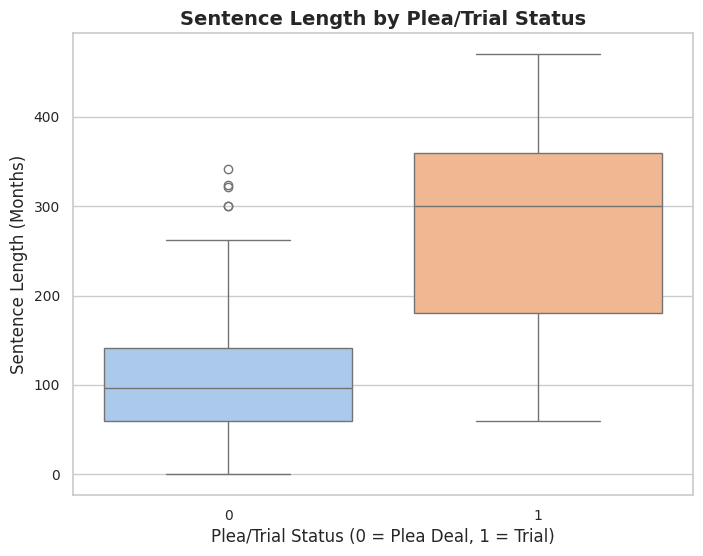

In [4]:
# Sentence Length by Plea/Trial Status
# VIZ 1 (matplotlib, seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='NEWCNVTN', y='SENTTCAP', data=data, palette='pastel')

plt.title('Sentence Length by Plea/Trial Status', fontsize=14, fontweight='bold')
plt.xlabel('Plea/Trial Status (0 = Plea Deal, 1 = Trial)', fontsize=12)
plt.ylabel('Sentence Length (Months)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


SCATTERPLOT: Sentence Length vs Quantity of Cocaine, Grouped by Plea/Trial

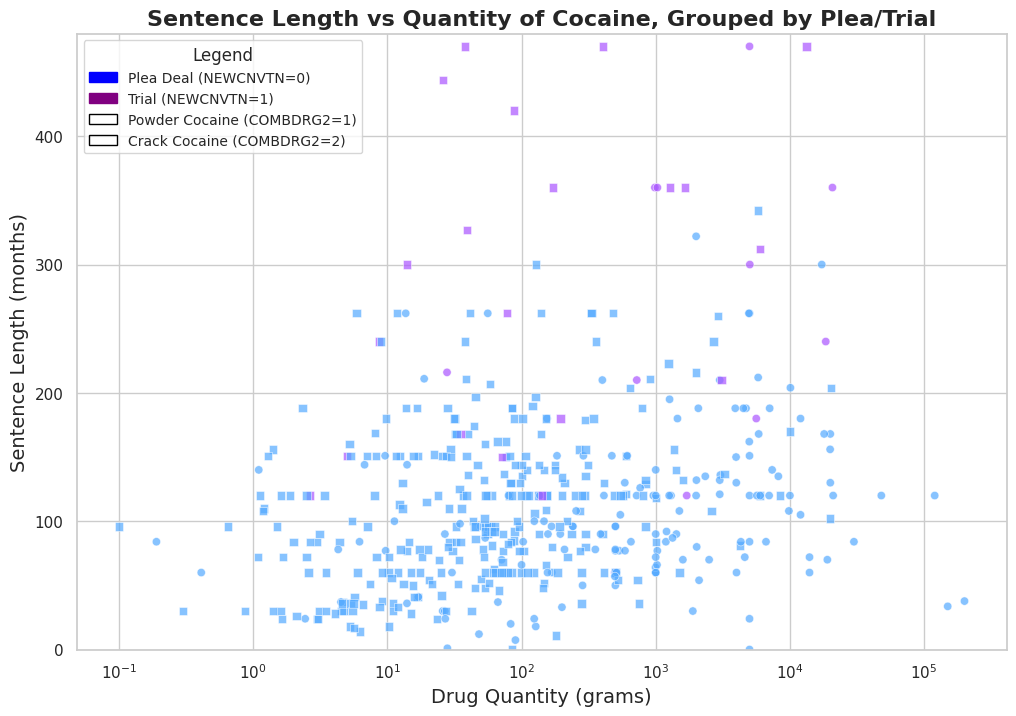

In [5]:
# Sentence Length vs Quantity of Cocaine, Grouped by Plea/Trial
# VIZ 2
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


# both cocaine types
cocaine_data = merged_data[merged_data['COMBDRG2'].isin([1, 2])]

sns.set(style="whitegrid")

# Create the scatterplot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=cocaine_data,
    x='WGT1',
    y='SENTTCAP',
    hue='NEWCNVTN',  # (0 = Plea, 1 = trial)
    style='COMBDRG2',  # (1 = Powder coke, 2 = Crack)
    palette='cool',
    markers={1: "o", 2: "s"},
    alpha=0.7
)

# Labels, titles
plt.title('Sentence Length vs Quantity of Cocaine, Grouped by Plea/Trial', fontsize=16, fontweight='bold')
plt.xlabel('Drug Quantity (grams)', fontsize=14)
plt.ylabel('Sentence Length (months)', fontsize=14)
plt.xscale('log')
plt.ylim(0, cocaine_data['SENTTCAP'].max() + 10)

# Legend
plea_patch = mpatches.Patch(color='blue', label='Plea Deal (NEWCNVTN=0)')
trial_patch = mpatches.Patch(color='purple', label='Trial (NEWCNVTN=1)')
powder_marker = mpatches.Circle((0, 0), radius=5, edgecolor='black', label='Powder Cocaine (COMBDRG2=1)', fill=False)
crack_marker = mpatches.Rectangle((0, 0), width=1, height=1, edgecolor='black', label='Crack Cocaine (COMBDRG2=2)', fill=False)

plt.legend(handles=[plea_patch, trial_patch, powder_marker, crack_marker], title='Legend', fontsize=10, loc='upper left')

plt.show()



PLOTLY: Quantity of Drug vs Sentence Length, Grouped by Race

In [7]:
## Quantity of Drug vs Sentence Length, Grouped by Race
# VIZ 3 (do plotly with moving dots for scatterplot - weight vs sentence length. colors: race)
import plotly.express as px

# Map NEWRACE numeric values to race labels
race_mapping = {
    1: 'White',
    2: 'Black',
    3: 'Hispanic',
    6: 'Other'
}
merged_data['Race_Label'] = merged_data['NEWRACE'].map(race_mapping)


# Create the scatter plot
fig = px.scatter(
    merged_data,
    x='WGT1',
    y='SENTTCAP',
    color='NEWRACE',   # 1 White, 2 Black, 3 Hispanic, 6 Other
    title='Quantity of Drug vs Sentence Length, Grouped by Race',
    labels={
        'WGT1': 'Drug Quantity (grams)',
        'SENTTCAP': 'Sentence Length (months)',
        'Race_Label': 'Race of Defendant'
    },
    log_x=True,
    hover_data=['STATE_final', 'NEWCNVTN', 'AGE']  # hover info
)

fig.update_layout(
    xaxis_title='Drug Quantity (grams)',
    yaxis_title='Sentence Length (months)',
    title_font=dict(size=16, family='Arial', color='black'),
    legend_title=dict(text='Race'),
    template='plotly_white'
)

# Show the plot
fig.show()


The above, but using animation slider based on race

In [8]:
import plotly.express as px

# Map NEWRACE numeric values to race labels
race_mapping = {
    1: 'White',
    2: 'Black',
    3: 'Hispanic',
    6: 'Other'
}
merged_data['Race_Label'] = merged_data['NEWRACE'].map(race_mapping)

# Create the scatter plot with a slider for Race_Label
fig = px.scatter(
    merged_data,
    x='WGT1',  # Drug quantity in grams
    y='SENTTCAP',  # Sentence length in months
    animation_frame='Race_Label',  # Create slider based on Race_Label
    title='Quantity of Drug vs Sentence Length, Grouped by Race',
    labels={
        'WGT1': 'Drug Quantity (grams)',
        'SENTTCAP': 'Sentence Length (months)',
        'Race_Label': 'Race of Defendant'
    },
    log_x=True,  # Optional: Log scale for drug quantity
    hover_data=['STATE_final', 'NEWCNVTN', 'AGE'],  # Add extra info in hover
    template='plotly_white'
)

# Customize the layout
fig.update_layout(
    xaxis_title='Drug Quantity (grams)',
    yaxis_title='Sentence Length (months)',
    title_font=dict(size=16, family='Arial', color='black'),
    transition={'duration': 500},  # Smooth transitions for slider
)

# Show the plot
fig.show()


SCATTERPLOT: Sentence Length vs State Income

In [9]:
import plotly.express as px

fig = px.scatter(
    merged_data,
    x='Value (Dollars)',  # State income
    y='SENTTCAP',  # Sentence length in months
    title='Sentence Length vs State Income',
    labels={
        'Value (Dollars)': 'State Income (Dollars)',
        'SENTTCAP': 'Sentence Length (Months)'
    },
    hover_data=['STATE_final', 'Race_Label', 'NEWCNVTN'],  # Add additional details in hover
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='State Income (Dollars)',
    yaxis_title='Sentence Length (Months)',
    title_font=dict(size=16, family='Arial', color='black'),
)

fig.show()
